# 선형회귀분석 

(연습, learning_rate와 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

In [2]:
x_data = [1., 2., 3., 4., 5., 6., 7., 8., 9., 10, 11, 12., 13., 14., 15.]
y_data = [2., 4., 6., 8., 10.,12.,14.,16., 18., 20., 22., 24., 26., 28., 29.9]

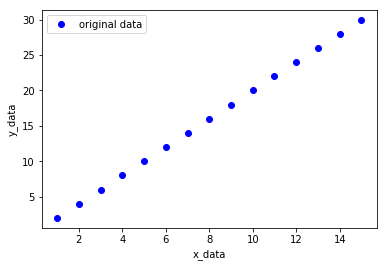

In [3]:
plt.plot(x_data, y_data,'bo',label='original data')
plt.xlabel('x_data')
plt.ylabel('y_data')
plt.legend()
plt.show()
           

try to find values for w and b that compute y_data = W * x_data + b

In [4]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

# my hypothesis
hypothesis = W * x_data + b

# Simplified cost function
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

Instructions for updating:
Colocations handled automatically by placer.


# Learning rate 
learning rata에 따라 계산 수렴성 관찰하기

In [5]:
# minimize
learning_rate = 0.0001

In [6]:
a = tf.Variable(learning_rate)  # learning rate, alpha

In [7]:
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)


init = tf.global_variables_initializer()
# launch
sess = tf.Session()
sess.run(init)
cost_history = np.empty(shape=[1],dtype=float)
W_history = np.empty(shape=[1],dtype=float)
b_history = np.empty(shape=[1],dtype=float)

In [8]:
# fit the line
epoch = 1000
for step in range(epoch):
    sess.run(train)
    if step % 100 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))
         
    cost_history = np.append(cost_history,sess.run(cost))       
    W_history = np.append(W_history,sess.run(W))  
    b_history = np.append(b_history,sess.run(b))
    


0 594.9343 [-0.6955403] [0.1204341]
100 20.573242 [1.4683839] [0.32876956]
200 0.7394348 [1.8706263] [0.3661644]
300 0.054286607 [1.9455013] [0.37179986]
400 0.030375276 [1.9595423] [0.3715394]
500 0.029300265 [1.9622777] [0.37018922]
600 0.029015815 [1.9629116] [0.3686424]
700 0.028760796 [1.9631544] [0.36706463]
800 0.028509129 [1.9633237] [0.3654869]
900 0.028259702 [1.9634787] [0.36391544]


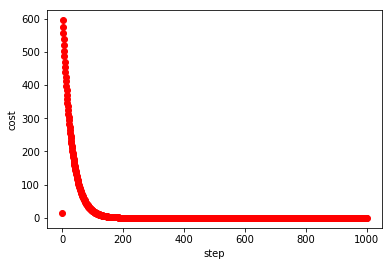

In [9]:
plt.plot(range(len(cost_history)),cost_history,'ro')
#plt.axis([0,np.log(epoch),0,np.max(cost_history)])
#plt.axis([0,epoch,0,60])
plt.xlabel('step')
plt.ylabel('cost')
plt.show()
           

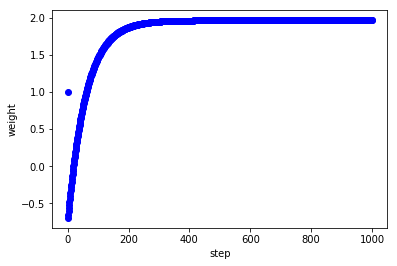

In [10]:
plt.plot(range(len(W_history)),W_history,'bo')
#plt.axis([0,epoch,-np.max(W_history),np.max(W_history)])
#plt.axis([0,epoch,0,2])
plt.xlabel('step')
plt.ylabel('weight')
plt.show()

           

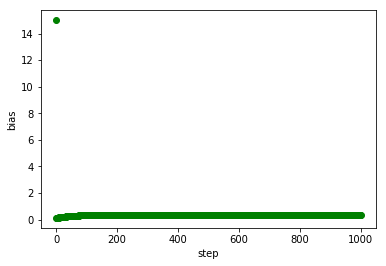

In [11]:
plt.plot(range(len(b_history)),b_history,'go')
#plt.axis([0,epoch,0,1])
plt.xlabel('step')
plt.ylabel('bias')
plt.show()

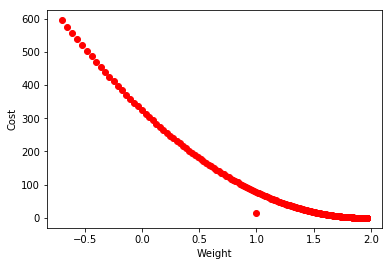

In [12]:
plt.plot(W_history, cost_history,'ro')
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()